# Importando bibliotecas

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose

# Carregando Dados

In [4]:
dados = pd.read_csv('alucar.csv')

In [5]:
print('Quantidade de linhas e colunas: ', dados.shape)

Quantidade de linhas e colunas:  (24, 2)


In [6]:
print('Quantidade de dados nulos: ', dados.isna().sum().sum())

Quantidade de dados nulos:  0


In [7]:
dados.dtypes

mes       object
vendas     int64
dtype: object

In [8]:
dados.mes = pd.to_datetime(dados.mes)
dados.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [9]:
print(sns.__version__)

0.11.2


# ALUCAR

## Alucar - Analisando as vendas

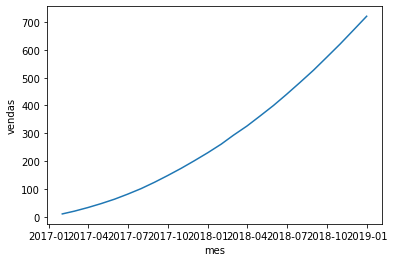

In [10]:
sns.lineplot(x = 'mes', y = 'vendas', data = dados)

#Grafico mostrando que as vendas estão aumentando com o passar do tempo.

#### Aperfeiçoando o gráfico

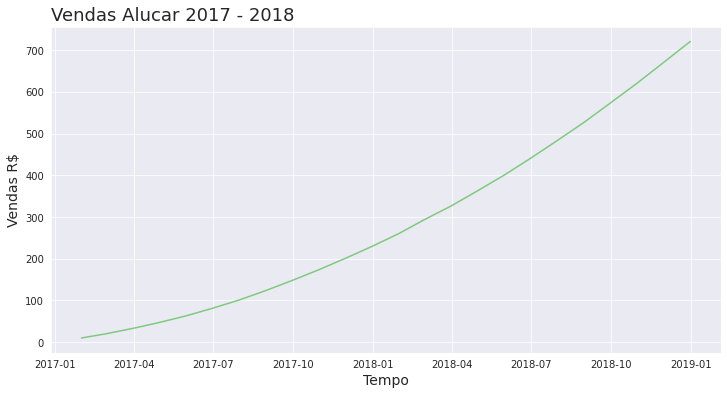

In [11]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = 'mes', y = 'vendas', data = dados)
ax.figure.set_size_inches(12, 6)
ax.set_title('Vendas Alucar 2017 - 2018', loc =  'left', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Vendas R$', fontsize = 14)
ax = ax

## Alucar - Decompondo as vendas

In [12]:
dados['aumento'] = dados.vendas.diff()
dados.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


In [13]:
def plotar(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x = x, y = y, data = dataset)
  ax.figure.set_size_inches(12, 6)
  ax.set_title(titulo, loc =  'left', fontsize = 18)
  ax.set_xlabel(labelx, fontsize = 14)
  ax.set_ylabel(labely, fontsize = 14)
  ax = ax

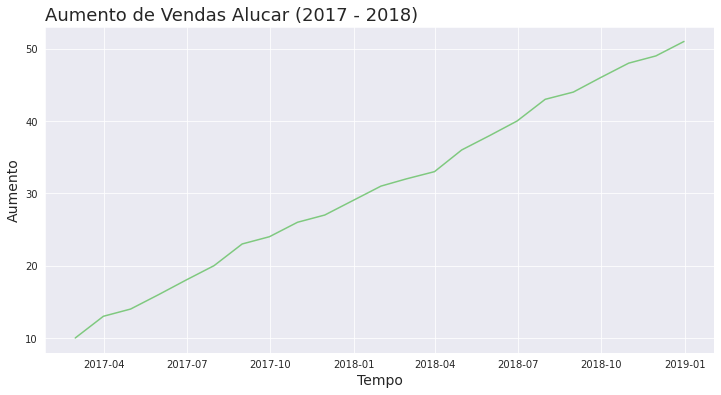

In [14]:
plotar('Aumento de Vendas Alucar (2017 - 2018)', 'Tempo', 'Aumento', 'mes', 'aumento', dados)

In [15]:
dados['aceleracao'] = dados.aumento.diff()

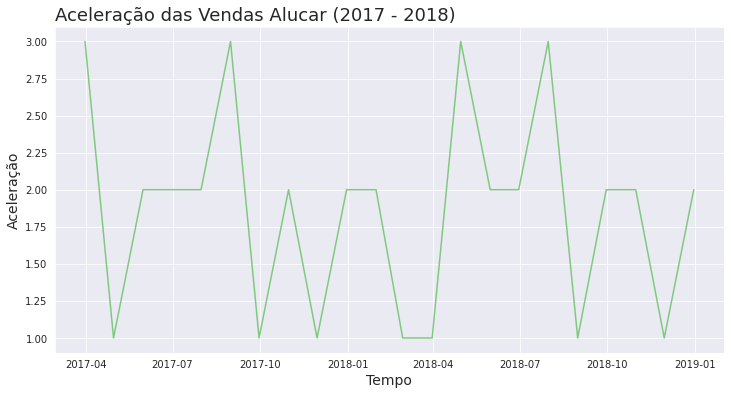

In [16]:
plotar('Aceleração das Vendas Alucar (2017 - 2018)', 'Tempo', 'Aceleração', 'mes', 'aceleracao', dados)

# Análise: Acelerção das vendas iniciaram em velocidade 3, e mantiveram-se sempre positivas justificando a linha crescente de vendas e de aumento.

### Observação e Tendencia

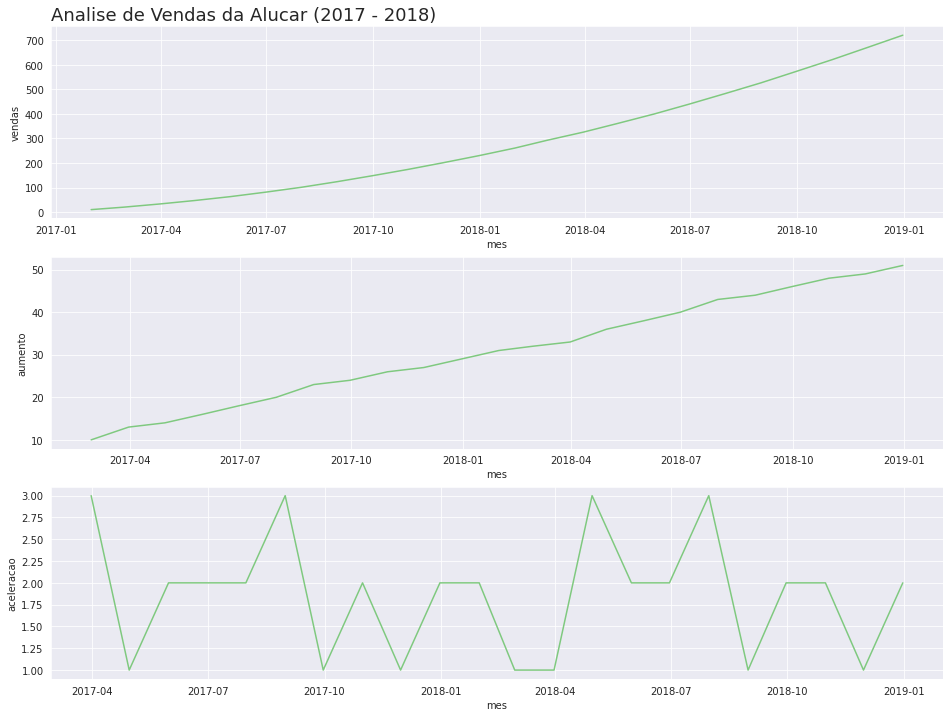

In [17]:
plt.figure(figsize = (16, 12))
ax = plt.subplot(3, 1, 1)
ax.set_title('Analise de Vendas da Alucar (2017 - 2018)', fontsize = 18, loc = 'left')
sns.lineplot(x = 'mes', y = 'vendas', data = dados)
plt.subplot(3, 1, 2)
sns.lineplot(x = 'mes', y = 'aumento', data = dados)
plt.subplot(3, 1, 3)
sns.lineplot(x = 'mes', y = 'aceleracao', data = dados)
ax = ax

In [18]:
def plot_compare(x, y1, y2, y3, dataset, titulo):
  plt.figure(figsize = (16, 12))
  ax = plt.subplot(3, 1, 1)
  ax.set_title(titulo, fontsize = 18, loc = 'left')
  sns.lineplot(x = x, y = y1, data = dataset)
  plt.subplot(3, 1, 2)
  sns.lineplot(x = x, y = y2, data = dataset)
  plt.subplot(3, 1, 3)
  sns.lineplot(x = x, y = y3, data = dataset)
  ax = ax

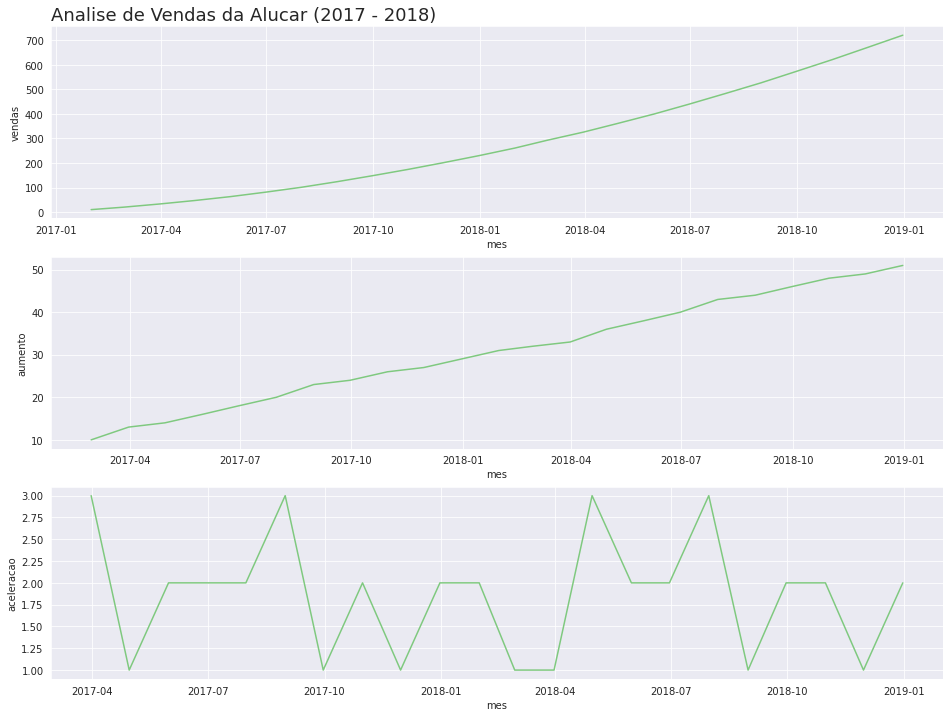

In [19]:
plot_compare('mes', 'vendas', 'aumento', 'aceleracao', dados, 'Analise de Vendas da Alucar (2017 - 2018)')

### Autocorrelação

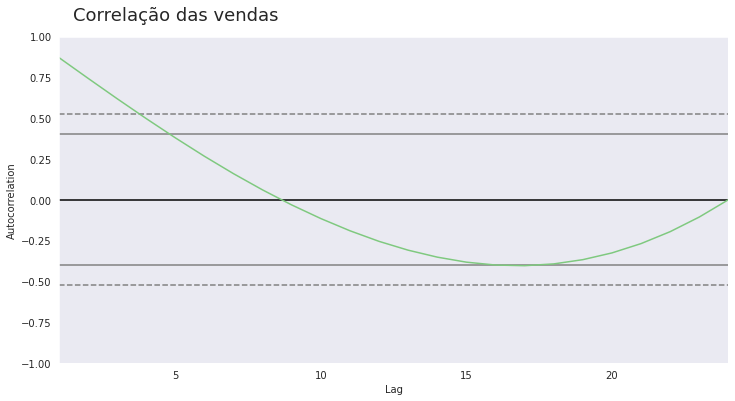

In [20]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlação das vendas', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(dados.vendas)
ax = ax

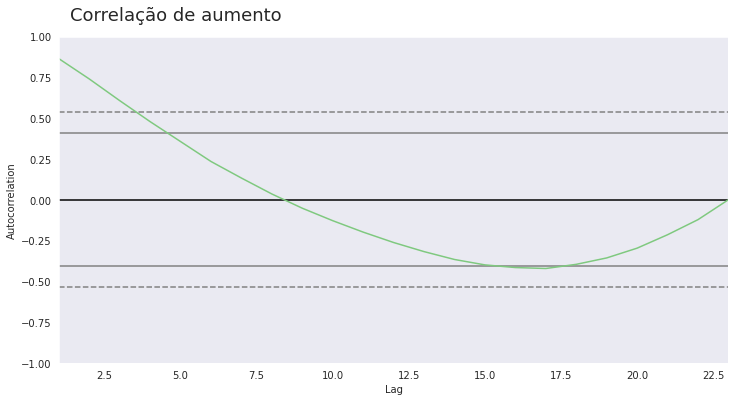

In [21]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlação de aumento', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(dados.aumento[1:])
ax = ax

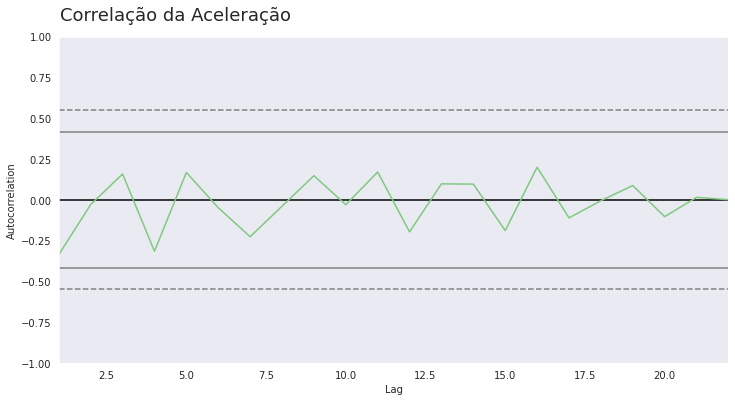

In [22]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlação da Aceleração', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(dados.aceleracao[2:])
ax = ax

## Alucar - Analisando assinantes da newsletter

In [23]:
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49
5,2017-06-30,66
6,2017-07-31,85
7,2017-08-31,107
8,2017-09-30,132
9,2017-10-31,160


In [24]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [25]:
assinantes.mes = pd.to_datetime(assinantes.mes)

In [26]:
assinantes['aumento'] = assinantes.assinantes.diff()
assinantes['aceleracao'] = assinantes.aumento.diff()
assinantes

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0
5,2017-06-30,66,17.0,2.0
6,2017-07-31,85,19.0,2.0
7,2017-08-31,107,22.0,3.0
8,2017-09-30,132,25.0,3.0
9,2017-10-31,160,28.0,3.0


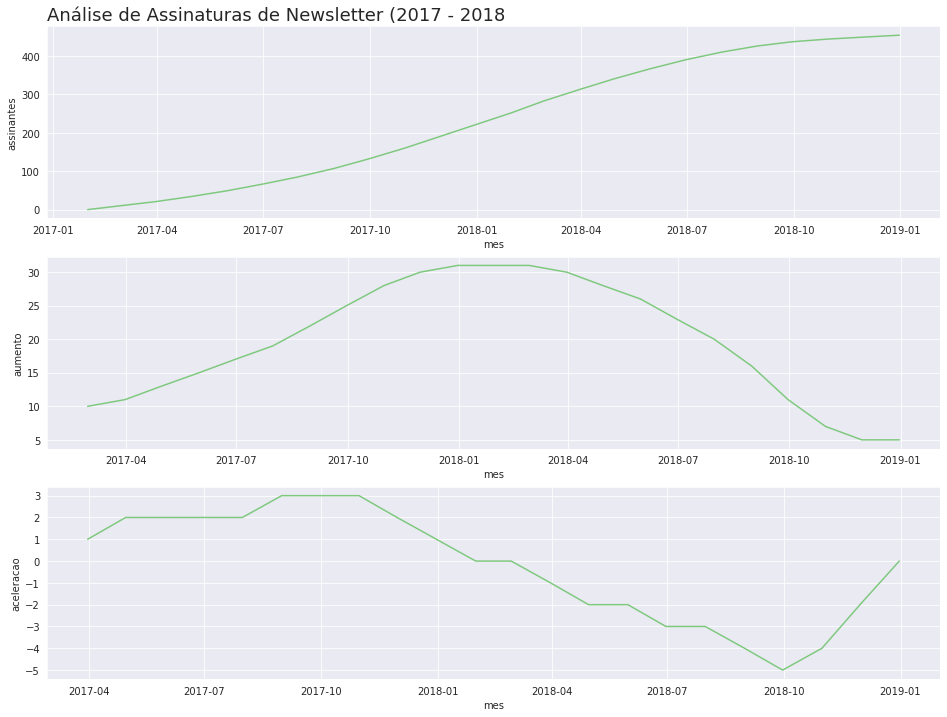

In [27]:
plot_compare('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de Assinaturas de Newsletter (2017 - 2018')

#Análise: houve uma tendencia de crescimento, mas prox a 04-2018 o houve uma queda de assinantes da newsletter, a a aceleraçãção teve um período negativo até aprox 01-2018 

#CHOCOLURA

## Chocolura - Análise de sazonalidade

In [28]:
chocolura = pd.read_csv('chocolura.csv')

In [29]:
chocolura

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211
5,2017-06,300
6,2017-07,210
7,2017-08,205
8,2017-09,208
9,2017-10,210


In [30]:
chocolura.mes = pd.to_datetime(chocolura.mes)

In [31]:
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [32]:
chocolura.shape

(24, 2)

In [33]:

chocolura.isna().sum().sum()

0

In [34]:
chocolura['aumento'] = chocolura.vendas.diff()
chocolura['aceleracao'] = chocolura.aumento.diff()
chocolura

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0
5,2017-06-01,300,89.0,158.0
6,2017-07-01,210,-90.0,-179.0
7,2017-08-01,205,-5.0,85.0
8,2017-09-01,208,3.0,8.0
9,2017-10-01,210,2.0,-1.0


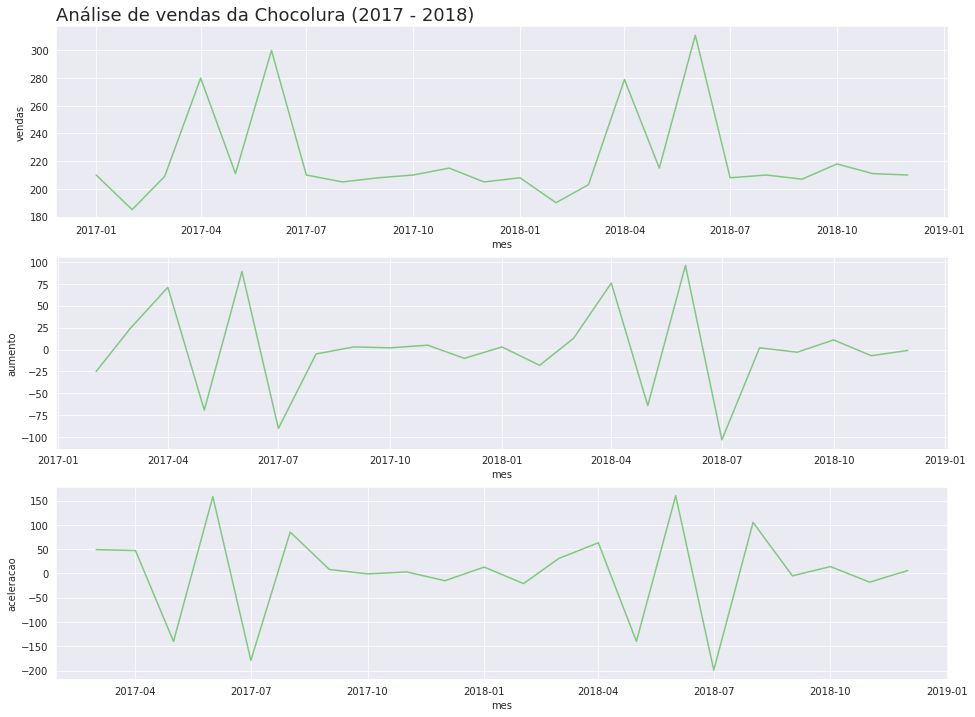

In [35]:
plot_compare('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Análise de vendas da Chocolura (2017 - 2018)')

In [36]:
# Análise: identifica-se Sazonalidade no mes 03 e 06 relacionada a vendas de chocolates
#   Analisando o calendário de feriados indentifica-se que no mês 04 comemora-se a Páscoa
#   e no mês 06 comemora-se o Dia dos namorados.

## Chocolura - Investigação de Sazonalidade

In [37]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')
vendas_por_dia

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51
...,...,...
56,2018-11-26,54
57,2018-11-27,60
58,2018-11-28,49
59,2018-11-29,50


In [38]:
# Tamanho do Df
vendas_por_dia.shape

(61, 2)

In [39]:
# Dados nulos
vendas_por_dia.isna().sum().sum()

0

In [40]:
vendas_por_dia.dia = pd.to_datetime(vendas_por_dia.dia)

In [41]:
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [42]:
vendas_por_dia['aumento'] = vendas_por_dia.vendas.diff()
vendas_por_dia['aceleracao'] = vendas_por_dia.aumento.diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


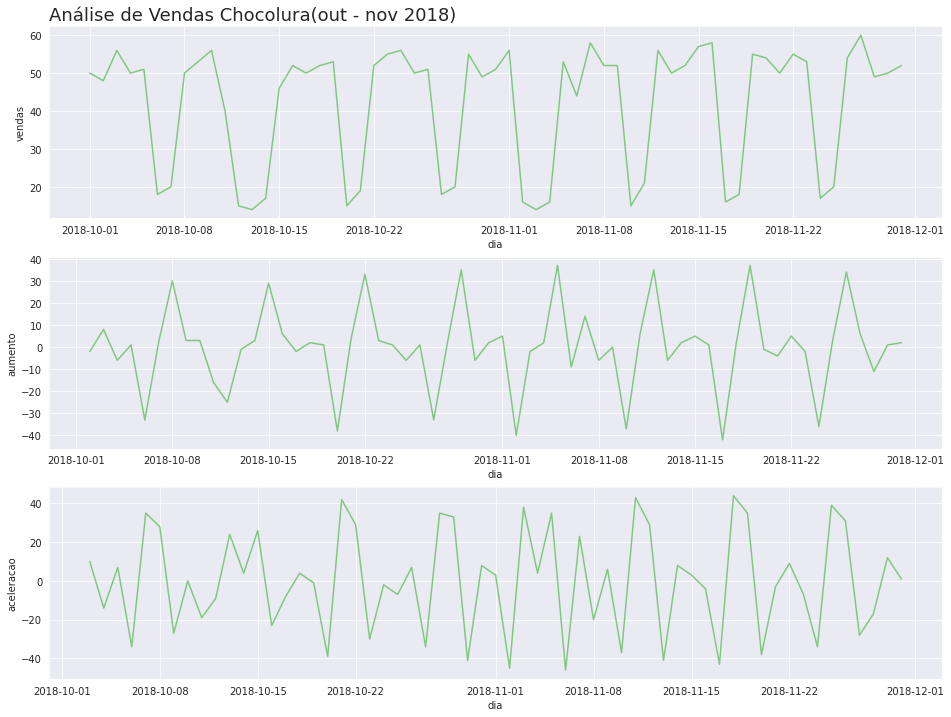

In [43]:
plot_compare('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Análise de Vendas Chocolura(out - nov 2018)')

### Analizando a sazonalidade

In [44]:
# Analise: verificando as datas:
#   1 Out 2018 - segunda
#   Verificar dia da semana para entender sazonalidade


In [45]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()

In [46]:
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


In [47]:
vendas_por_dia.dia_da_semana.unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [48]:
dias_traduzidos = {'Monday' : 'Segunda', 'Tuesday' : 'Terca', 'Wednesday' :'Quarta', 'Thursday' : 'Quinta', 'Friday' : 'Sexta', 'Saturday' : 'Sábado',
       'Sunday' : 'Domingo'}

In [49]:
vendas_por_dia.dia_da_semana = vendas_por_dia.dia_da_semana.map(dias_traduzidos)

In [50]:
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sábado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terca
9,2018-10-10,56,3.0,0.0,Quarta


### Agrupando os dias

In [51]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')[['vendas', 'aumento', 'aceleracao']].mean().round()

In [52]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terca,52.0,-1.0,-34.0


In [53]:
# Análise: a investigação retornou que a saonalidade é referente aos dias da semana 
# o que pode significar uma regra de négocio que influencia nos fins de semanas terem valores menores.

### Correlação de vendas diárias

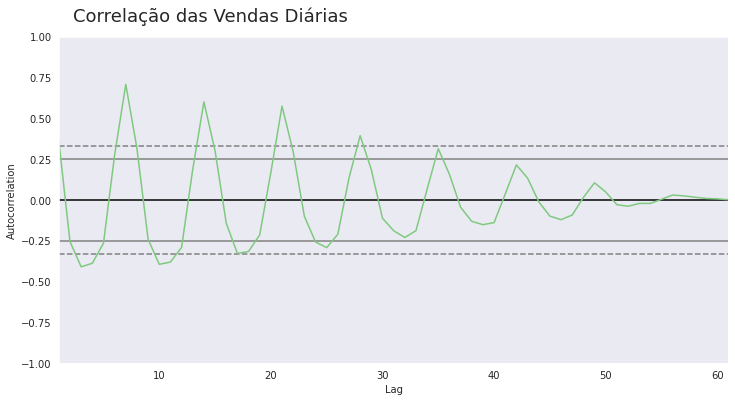

In [56]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlação das Vendas Diárias', fontsize = 18, x = 0.3, y = 0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

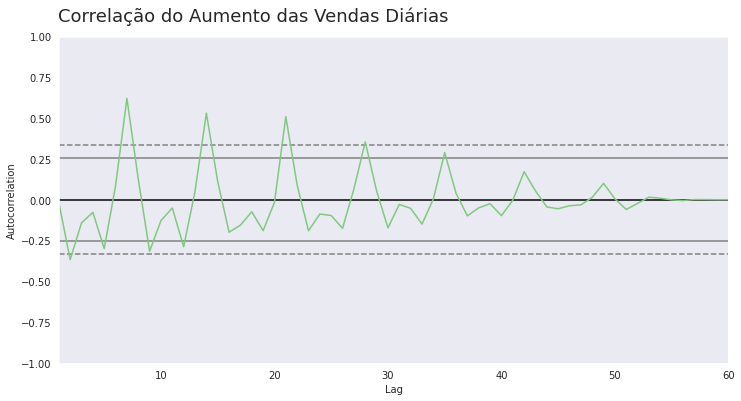

In [58]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlação do Aumento das Vendas Diárias', fontsize = 18, x = 0.35, y = 0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

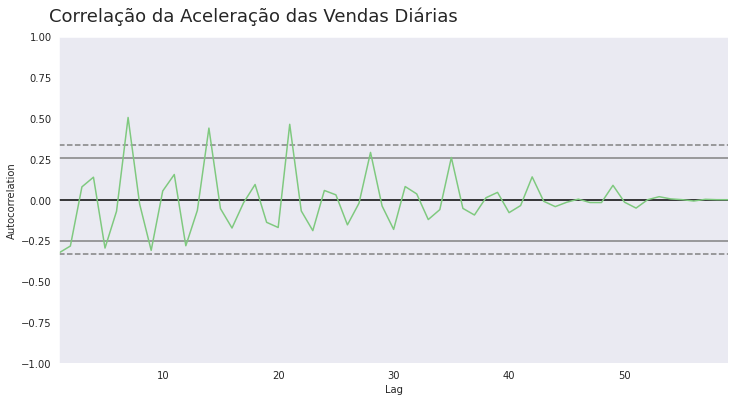

In [59]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlação da Aceleração das Vendas Diárias', fontsize = 18, x = 0.35, y = 0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

### Statsmodels

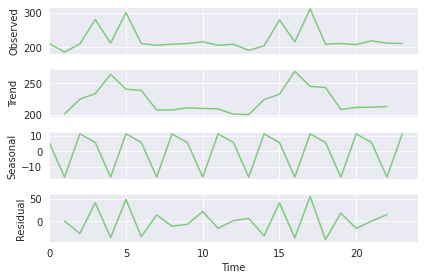

In [80]:
resultado = seasonal_decompose([chocolura.vendas], freq = 3)
ax = resultado.plot()

In [81]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid


In [82]:
data = ({
      'observacao' : observacao,
      'tendencia' : tendencia,
      'sazonalidade' : sazonalidade,
      'ruido' : ruido
})

resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210,NaN,5.603175,NaN
1,185,201.333333,-16.730159,0.396825
2,209,224.666667,11.126984,-26.793651
3,280,233.333333,5.603175,41.063492
4,211,263.666667,-16.730159,-35.936508


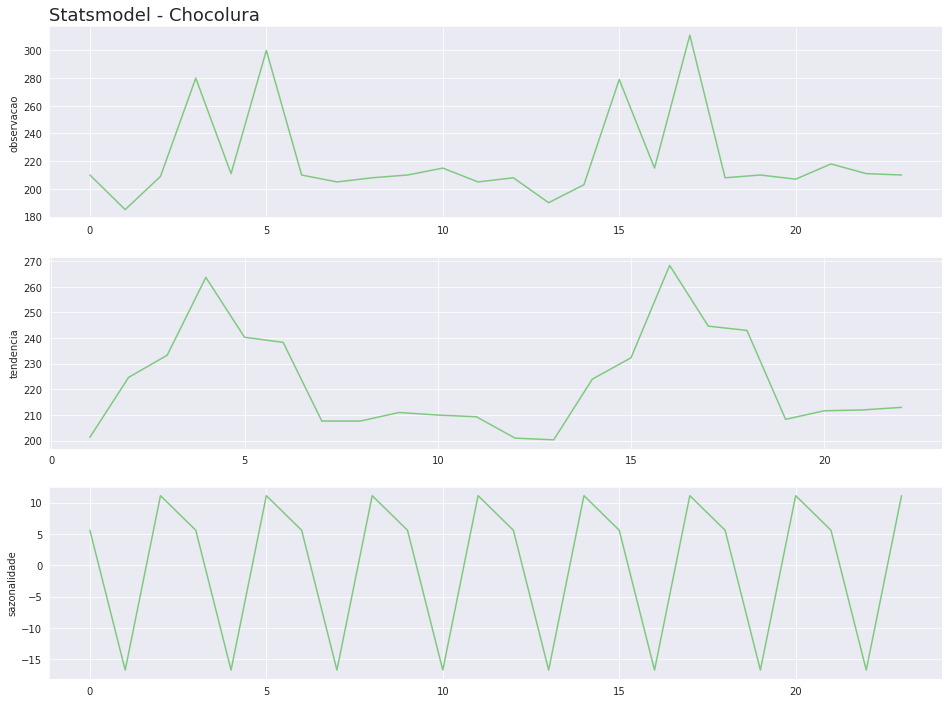

In [85]:
plot_compare(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado, 'Statsmodel - Chocolura')

# Statsmodels trazem as informações de forma separada para as análises visuais.

# CAFELURA



## Cafelura - Analise de vendas

In [60]:
cafelura = pd.read_csv('cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [61]:
cafelura.mes = pd.to_datetime(cafelura.mes)

In [62]:
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [63]:
print('Tamanho Df: ', cafelura.shape)
print('Dados nulos: ', cafelura.isna().sum().sum())

Tamanho Df:  (24, 2)
Dados nulos:  0


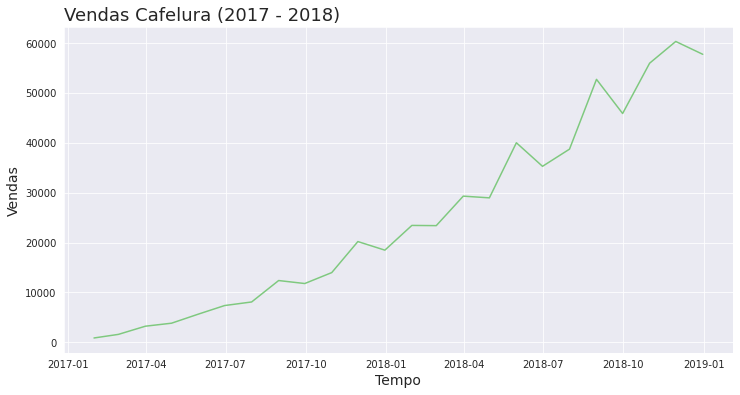

In [64]:
plotar('Vendas Cafelura (2017 - 2018)', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

In [66]:
quantidade_dias_fds = pd.read_csv('dias_final_de_semana.csv')
quantidade_dias_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [67]:
quantidade_dias_fds.quantidade_de_dias.values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [68]:
cafelura['vendas_normalizadas'] = cafelura.vendas / quantidade_dias_fds.quantidade_de_dias.values
cafelura.head()

# A normalização consiste em remover ruidos do gráfico para ter uma real noção do
# comportamento do gráfico e evitar resultados incorretos.

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


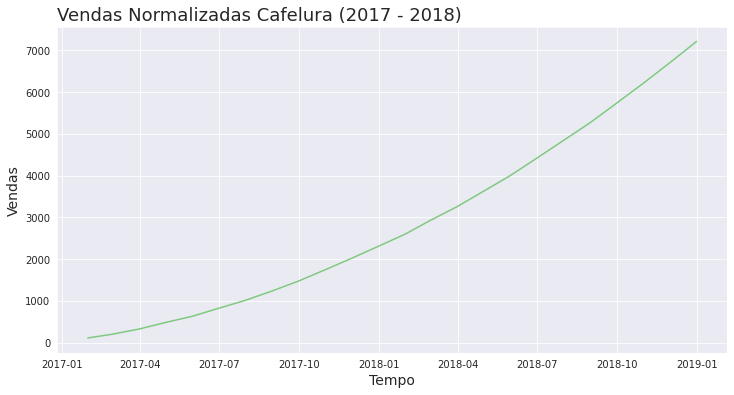

In [69]:
plotar('Vendas Normalizadas Cafelura (2017 - 2018)', 'Tempo', 'Vendas', 'mes', 'vendas_normalizadas', cafelura)

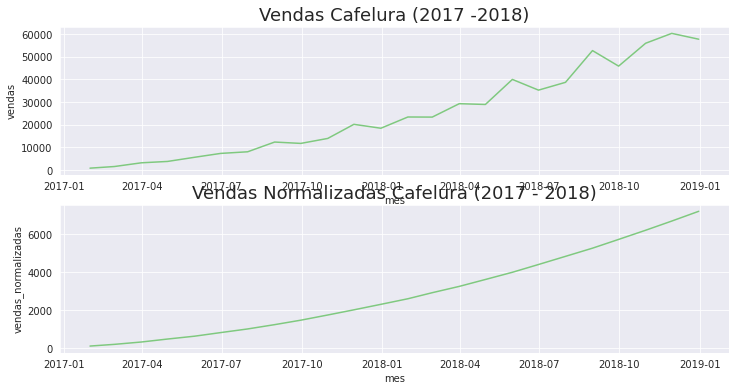

In [72]:
plt.figure(figsize = (12, 6))
ax = plt.subplot(2, 1, 1)
ax.set_title('Vendas Cafelura (2017 -2018)', fontsize = 18)
sns.lineplot(x = 'mes', y = 'vendas', data = cafelura)
ax = plt.subplot(2, 1, 2)
ax.set_title('Vendas Normalizadas Cafelura (2017 - 2018)', fontsize = 18)
sns.lineplot(x = 'mes', y = 'vendas_normalizadas', data = cafelura)
ax = ax

# ALUCEL

## Alucel - Análise de vendas

In [86]:
alucel = pd.read_csv('alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [90]:
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [88]:
alucel.dia = pd.to_datetime(alucel.dia)

In [91]:
print('Shape: ', alucel.shape)
print('Dados Nulos: ', alucel.isna().sum().sum())

Shape:  (61, 2)
Dados Nulos:  0


In [93]:
alucel['aumento'] = alucel.vendas.diff()
alucel['aceleracao'] = alucel.aumento.diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


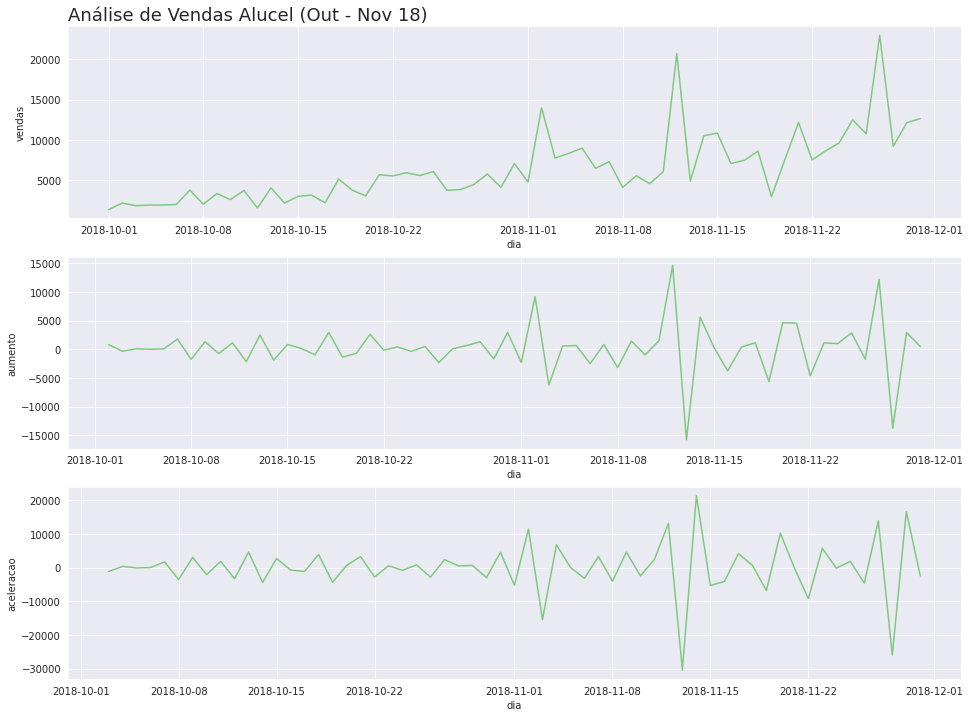

In [94]:
plot_compare('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Análise de Vendas Alucel (Out - Nov 18)')

#### Média móvel

In [97]:
alucel['media_movel'] = alucel.vendas.rolling(7).mean()
alucel.head(14)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.827143
8,2018-10-09,3365.58,1325.99,3079.47,2421.382857
9,2018-10-10,2616.12,-749.46,-2075.45,2529.348571


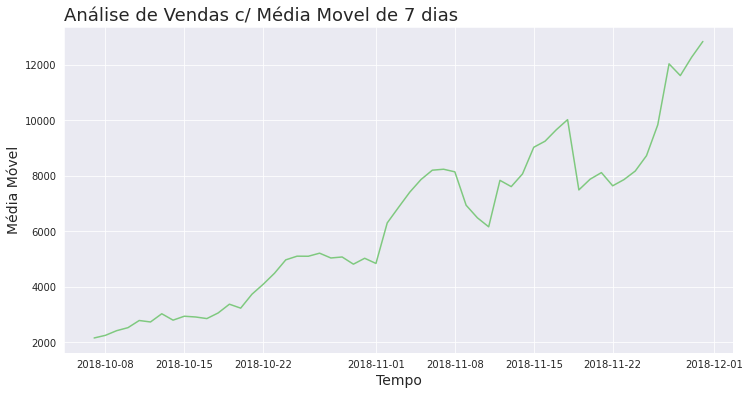

In [98]:
plotar('Análise de Vendas c/ Média Movel de 7 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel', alucel)

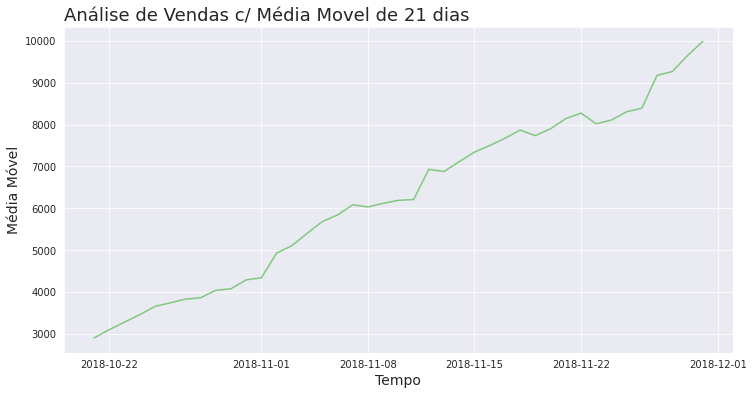

In [99]:
alucel['media_movel_21'] = alucel.vendas.rolling(21).mean()
alucel.head(14)
plotar('Análise de Vendas c/ Média Movel de 21 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel_21', alucel)

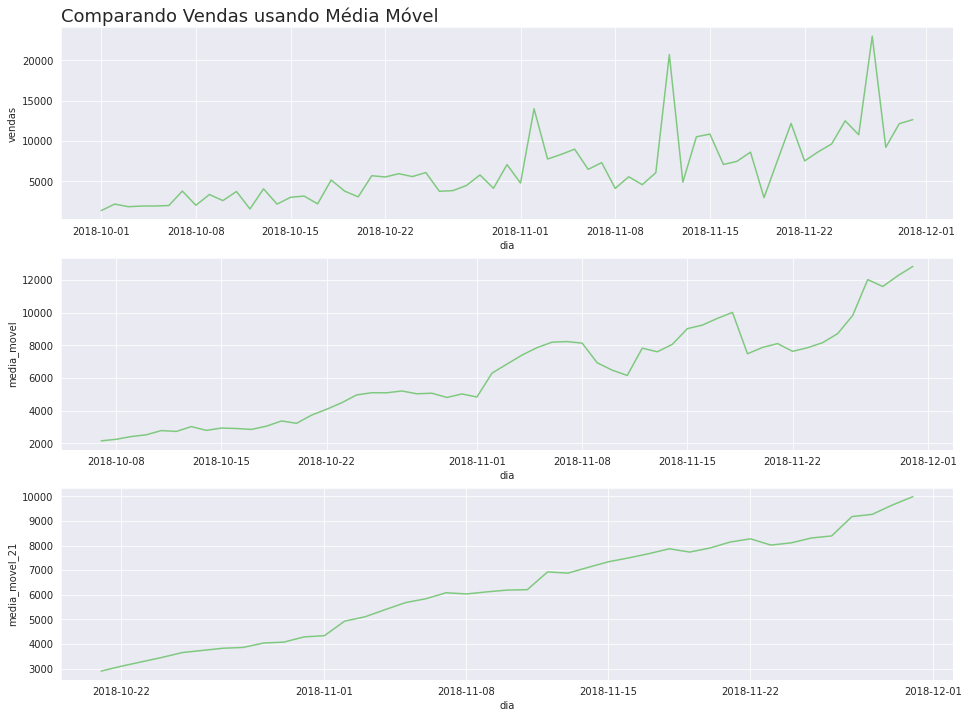

In [100]:
plot_compare('dia', 'vendas', 'media_movel', 'media_movel_21', alucel, 'Comparando Vendas usando Média Móvel')